In [1359]:
import pandas as pd 
import pyreadstat 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore


%matplotlib inline


In [1360]:
file_path = "/Users/boryabaghir/Desktop/spss/industry.SAV"
pd.to_csv = file_path
data, meta = pyreadstat.read_sav(file_path)
data  

,INTNR,dsk2,nace,Q002.1,Q002.2,fin_nace,TQ002.3o,Q003,Q003o,Q004,...,Q033.4,Q033.5,Q033.7,Q034,region,profit_before_tax2021,net_profit2021,avgWage,numInsured2,avgWage2
0,3305.0,2.0,23.0,2.0,32.0,32.0,"Aliuminio langai,fasadai.",1.0,NaN,1.0,...,0.0,0.0,2020.0,1.0,6.0,36551.0,30752.0,NaN,0.0,NaN
1,4023.0,1.0,27.0,2.0,32.0,32.0,Medicinininių elektroninių prietaisų gamyba,1.0,NaN,2.0,...,5.0,0.0,2017.0,1.0,1.0,NaN,NaN,NaN,0.0,NaN
2,3.0,2.0,16.0,2.0,32.0,32.0,Malkos,8.0,15.0,4.0,...,0.0,0.0,2012.0,1.0,10.0,NaN,NaN,NaN,0.0,NaN
3,290.0,2.0,26.0,2.0,32.0,32.0,"medicininė įranga, inkubatoriai",8.0,10.0,3.0,...,4.0,0.0,2010.0,1.0,2.0,NaN,NaN,NaN,0.0,NaN
4,1767.0,2.0,25.0,2.0,32.0,32.0,Centrinio šildymo radiatorių ir katilų gamyba,1.0,NaN,1.0,...,3.0,NaN,2008.0,1.0,2.0,327308.0,273056.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,594.0,1.0,11.0,1.0,NaN,11.0,alus,1.0,NaN,2.0,...,1.0,1.0,1990.0,2.0,1.0,NaN,NaN,NaN,0.0,NaN
502,1282.0,2.0,16.0,1.0,NaN,16.0,"laiptai, durys, baldai, apvadai durų ir langų",4.0,NaN,1.0,...,0.0,0.0,1990.0,2.0,8.0,2215.0,2115.0,NaN,0.0,NaN
503,2002.0,2.0,13.0,1.0,NaN,13.0,tekstilės,4.0,NaN,3.0,...,0.0,0.0,1990.0,2.0,7.0,148542.0,148542.0,NaN,0.0,NaN
504,2248.0,2.0,16.0,1.0,NaN,16.0,"lauko saunos, nameliai, pirtys",1.0,NaN,2.0,...,1.0,0.0,1990.0,2.0,10.0,-190611.0,-190611.0,NaN,0.0,NaN


In [1361]:
question_prefixes = ['Q016', 'Q017', 'Q018', 'Q019','Q020', 'Q021', 'Q022', 'Q023', 'Q024','Q025', 'Q026', 'Q027']
for prefix in question_prefixes:
    group_columns = [col for col in data.columns if col.startswith(prefix)]
    data[f'{prefix}_Composite_Score'] = data[group_columns].mean(axis=1).round(1)

data

,INTNR,dsk2,nace,Q002.1,Q002.2,fin_nace,TQ002.3o,Q003,Q003o,Q004,...,Q018_Composite_Score,Q019_Composite_Score,Q020_Composite_Score,Q021_Composite_Score,Q022_Composite_Score,Q023_Composite_Score,Q024_Composite_Score,Q025_Composite_Score,Q026_Composite_Score,Q027_Composite_Score
0,3305.0,2.0,23.0,2.0,32.0,32.0,"Aliuminio langai,fasadai.",1.0,NaN,1.0,...,3.3,2.3,3.0,2.7,3.3,2.0,2.0,2.0,2.0,2.3
1,4023.0,1.0,27.0,2.0,32.0,32.0,Medicinininių elektroninių prietaisų gamyba,1.0,NaN,2.0,...,4.0,NaN,NaN,5.0,4.3,3.0,1.0,2.3,2.0,NaN
2,3.0,2.0,16.0,2.0,32.0,32.0,Malkos,8.0,15.0,4.0,...,1.0,2.3,1.0,2.3,1.0,1.0,1.0,1.0,1.0,1.0
3,290.0,2.0,26.0,2.0,32.0,32.0,"medicininė įranga, inkubatoriai",8.0,10.0,3.0,...,4.7,NaN,5.0,3.0,5.0,1.0,NaN,NaN,NaN,NaN
4,1767.0,2.0,25.0,2.0,32.0,32.0,Centrinio šildymo radiatorių ir katilų gamyba,1.0,NaN,1.0,...,3.7,1.0,3.3,3.3,2.7,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,594.0,1.0,11.0,1.0,NaN,11.0,alus,1.0,NaN,2.0,...,2.7,1.0,1.3,2.7,1.7,2.0,1.5,2.0,1.0,2.7
502,1282.0,2.0,16.0,1.0,NaN,16.0,"laiptai, durys, baldai, apvadai durų ir langų",4.0,NaN,1.0,...,NaN,1.7,4.0,2.0,2.3,NaN,1.0,1.7,2.0,1.5
503,2002.0,2.0,13.0,1.0,NaN,13.0,tekstilės,4.0,NaN,3.0,...,2.0,2.0,1.5,3.7,4.3,2.3,2.0,4.0,1.7,3.0
504,2248.0,2.0,16.0,1.0,NaN,16.0,"lauko saunos, nameliai, pirtys",1.0,NaN,2.0,...,4.0,4.0,4.0,3.7,4.0,3.7,NaN,4.0,4.0,3.7


In [1362]:
rename_dict = {
    'TQ002.3o': 'industry',
    'Q016_Composite_Score': 'Digital_Customer_Support_Score',
    'Q017_Composite_Score': 'Customer_Support_Services_Score',
    'Q018_Composite_Score': 'ERP_Supported_Manufacturing_Score',
    'Q019_Composite_Score': 'Industrial_Automation_Score',
    'Q020_Composite_Score': 'Computer_Aided_Design_Score',
    'Q021_Composite_Score': 'Digitization_of_Documentation_Score',
    'Q022_Composite_Score': 'Real_Time_Control_Inventory_Score',
    'Q023_Composite_Score': 'Real_Time_Control_Manufacturing_Score',
    'Q024_Composite_Score': 'Machine_Learning_AI_Score',
    'Q025_Composite_Score': 'Simulation_Score',
    'Q026_Composite_Score': 'AR_score',
    'Q027_Composite_Score': 'Smart_Manufacturing_Score',
    'Q033.1': 'Annual_Turnover',
    'net_profit2021': 'net_profit'
}

data.rename(columns=rename_dict, inplace=True)


In [1363]:
columns_to_keep = list(rename_dict.values())
data = data[columns_to_keep]
data


,industry,Digital_Customer_Support_Score,Customer_Support_Services_Score,ERP_Supported_Manufacturing_Score,Industrial_Automation_Score,Computer_Aided_Design_Score,Digitization_of_Documentation_Score,Real_Time_Control_Inventory_Score,Real_Time_Control_Manufacturing_Score,Machine_Learning_AI_Score,Simulation_Score,AR_score,Smart_Manufacturing_Score,Annual_Turnover,net_profit
0,"Aliuminio langai,fasadai.",2.0,3.3,3.3,2.3,3.0,2.7,3.3,2.0,2.0,2.0,2.0,2.3,1073924.0,30752.0
1,Medicinininių elektroninių prietaisų gamyba,4.3,4.7,4.0,NaN,NaN,5.0,4.3,3.0,1.0,2.3,2.0,NaN,NaN,NaN
2,Malkos,1.0,1.0,1.0,2.3,1.0,2.3,1.0,1.0,1.0,1.0,1.0,1.0,900000.0,NaN
3,"medicininė įranga, inkubatoriai",NaN,5.0,4.7,NaN,5.0,3.0,5.0,1.0,NaN,NaN,NaN,NaN,6500000.0,NaN
4,Centrinio šildymo radiatorių ir katilų gamyba,1.0,2.0,3.7,1.0,3.3,3.3,2.7,1.0,1.0,1.0,1.0,1.0,3839360.0,273056.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,alus,3.3,2.0,2.7,1.0,1.3,2.7,1.7,2.0,1.5,2.0,1.0,2.7,1000000.0,NaN
502,"laiptai, durys, baldai, apvadai durų ir langų",2.0,3.3,NaN,1.7,4.0,2.0,2.3,NaN,1.0,1.7,2.0,1.5,815110.0,2115.0
503,tekstilės,5.0,2.0,2.0,2.0,1.5,3.7,4.3,2.3,2.0,4.0,1.7,3.0,2192224.0,148542.0
504,"lauko saunos, nameliai, pirtys",4.0,4.0,4.0,4.0,4.0,3.7,4.0,3.7,NaN,4.0,4.0,3.7,10964752.0,-190611.0


In [1364]:
for idx, col in enumerate(data.columns):
    print(f"{idx}: {col}")

0: industry
1: Digital_Customer_Support_Score
2: Customer_Support_Services_Score
3: ERP_Supported_Manufacturing_Score
4: Industrial_Automation_Score
5: Computer_Aided_Design_Score
6: Digitization_of_Documentation_Score
7: Real_Time_Control_Inventory_Score
8: Real_Time_Control_Manufacturing_Score
9: Machine_Learning_AI_Score
10: Simulation_Score
11: AR_score
12: Smart_Manufacturing_Score
13: Annual_Turnover
14: net_profit


In [1365]:
data.isna().sum()

industry                                   0
Digital_Customer_Support_Score            96
Customer_Support_Services_Score           42
ERP_Supported_Manufacturing_Score         91
Industrial_Automation_Score              117
Computer_Aided_Design_Score               65
Digitization_of_Documentation_Score       32
Real_Time_Control_Inventory_Score         33
Real_Time_Control_Manufacturing_Score     97
Machine_Learning_AI_Score                166
Simulation_Score                         124
AR_score                                 146
Smart_Manufacturing_Score                 99
Annual_Turnover                           11
net_profit                               143
dtype: int64

In [1366]:
missing_values = data.isna().sum()
missing_values_sorted = missing_values[missing_values >= 0].sort_values(ascending=False)
missing_values_sorted

Machine_Learning_AI_Score                166
AR_score                                 146
net_profit                               143
Simulation_Score                         124
Industrial_Automation_Score              117
Smart_Manufacturing_Score                 99
Real_Time_Control_Manufacturing_Score     97
Digital_Customer_Support_Score            96
ERP_Supported_Manufacturing_Score         91
Computer_Aided_Design_Score               65
Customer_Support_Services_Score           42
Real_Time_Control_Inventory_Score         33
Digitization_of_Documentation_Score       32
Annual_Turnover                           11
industry                                   0
dtype: int64

In [1367]:
features = [
    'Digital_Customer_Support_Score', 'Customer_Support_Services_Score',
    'ERP_Supported_Manufacturing_Score', 'Industrial_Automation_Score',
    'Computer_Aided_Design_Score', 'Digitization_of_Documentation_Score',
    'Real_Time_Control_Inventory_Score', 'Real_Time_Control_Manufacturing_Score',
    'Machine_Learning_AI_Score', 'Simulation_Score', 'AR_score', 'Smart_Manufacturing_Score'
]

# Remove rows with outliers for the specified features
for feature in features:
    digital = data[(zscore(data[feature]) < 3)]


In [1368]:
for feature in features:
    Q1 = digital[feature].quantile(0.25)
    Q3 = digital[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with the median
    digital.loc[(digital[feature] < lower_bound) | (digital[feature] > upper_bound), feature] = digital[feature].median()


In [1369]:
digital= data.dropna(subset=['net_profit', 'Annual_Turnover'])
digital

,industry,Digital_Customer_Support_Score,Customer_Support_Services_Score,ERP_Supported_Manufacturing_Score,Industrial_Automation_Score,Computer_Aided_Design_Score,Digitization_of_Documentation_Score,Real_Time_Control_Inventory_Score,Real_Time_Control_Manufacturing_Score,Machine_Learning_AI_Score,Simulation_Score,AR_score,Smart_Manufacturing_Score,Annual_Turnover,net_profit
0,"Aliuminio langai,fasadai.",2.0,3.3,3.3,2.3,3.0,2.7,3.3,2.0,2.0,2.0,2.0,2.3,1073924.0,30752.0
4,Centrinio šildymo radiatorių ir katilų gamyba,1.0,2.0,3.7,1.0,3.3,3.3,2.7,1.0,1.0,1.0,1.0,1.0,3839360.0,273056.0
6,medienos biokuras,4.0,2.0,NaN,NaN,NaN,4.5,5.0,NaN,NaN,NaN,NaN,3.0,7442645.0,890008.0
8,namai,NaN,5.0,3.0,NaN,5.0,3.5,3.7,NaN,NaN,3.0,NaN,4.0,524822.0,-56707.0
9,"Nuo nurūgštinimo , trąšų gamyba",NaN,NaN,NaN,NaN,2.0,3.3,4.3,2.0,NaN,5.0,4.3,4.0,370366.0,488083.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,Įrenginiai maisto pramonei,1.0,2.3,3.3,1.7,2.3,1.7,3.7,2.0,1.0,1.0,1.0,1.0,3241477.0,184842.0
500,maisto gamyba,1.7,2.3,1.0,1.0,1.0,2.0,3.0,3.0,3.0,1.7,2.0,2.0,470433.0,49453.0
502,"laiptai, durys, baldai, apvadai durų ir langų",2.0,3.3,NaN,1.7,4.0,2.0,2.3,NaN,1.0,1.7,2.0,1.5,815110.0,2115.0
503,tekstilės,5.0,2.0,2.0,2.0,1.5,3.7,4.3,2.3,2.0,4.0,1.7,3.0,2192224.0,148542.0


In [1370]:
missing_values = digital.isna().sum()
missing_values_sorted = missing_values[missing_values >= 0].sort_values(ascending=False)
missing_values_sorted

Machine_Learning_AI_Score                120
AR_score                                 102
Simulation_Score                          88
Industrial_Automation_Score               81
Real_Time_Control_Manufacturing_Score     72
Digital_Customer_Support_Score            70
Smart_Manufacturing_Score                 68
ERP_Supported_Manufacturing_Score         64
Computer_Aided_Design_Score               36
Customer_Support_Services_Score           31
Digitization_of_Documentation_Score       22
Real_Time_Control_Inventory_Score         22
industry                                   0
Annual_Turnover                            0
net_profit                                 0
dtype: int64

In [1371]:
scaler = MinMaxScaler()
digital[['net_profit_norm', 'Annual_Turnover_norm']] = scaler.fit_transform(
    digital[['net_profit', 'Annual_Turnover']]
)
digital['Performance_Score'] = (digital['net_profit_norm'] + digital['Annual_Turnover_norm']) / 2


/var/folders/p4/scbl6gdx7834jxtztb0_p47w0000gn/T/ipykernel_1115/1831550554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  digital[['net_profit_norm', 'Annual_Turnover_norm']] = scaler.fit_transform(
/var/folders/p4/scbl6gdx7834jxtztb0_p47w0000gn/T/ipykernel_1115/1831550554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  digital[['net_profit_norm', 'Annual_Turnover_norm']] = scaler.fit_transform(
/var/folders/p4/scbl6gdx7834jxtztb0_p47w0000gn/T/ipykernel_1115/1831550554.py:5: SettingWithCopyWarning:

In [1372]:
digital.drop(columns=['Annual_Turnover', 'net_profit'], inplace = True)

/var/folders/p4/scbl6gdx7834jxtztb0_p47w0000gn/T/ipykernel_1115/1515178542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  digital.drop(columns=['Annual_Turnover', 'net_profit'], inplace = True)


In [1373]:
print(digital.columns)


Index(['industry', 'Digital_Customer_Support_Score',
       'Customer_Support_Services_Score', 'ERP_Supported_Manufacturing_Score',
       'Industrial_Automation_Score', 'Computer_Aided_Design_Score',
       'Digitization_of_Documentation_Score',
       'Real_Time_Control_Inventory_Score',
       'Real_Time_Control_Manufacturing_Score', 'Machine_Learning_AI_Score',
       'Simulation_Score', 'AR_score', 'Smart_Manufacturing_Score',
       'net_profit_norm', 'Annual_Turnover_norm', 'Performance_Score'],
      dtype='object')


In [1374]:
threshold = digital['Performance_Score'].quantile(0.75)
digital['Performance_Category'] = digital['Performance_Score'].apply(
    lambda x: 'Top' if x > threshold else 'Others'
)


/var/folders/p4/scbl6gdx7834jxtztb0_p47w0000gn/T/ipykernel_1115/2907182767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  digital['Performance_Category'] = digital['Performance_Score'].apply(


In [1375]:
print(digital['Performance_Category'].value_counts())

Performance_Category
Others    271
Top        90
Name: count, dtype: int64


In [1376]:
for col in ['Digital_Customer_Support_Score', 'Customer_Support_Services_Score', 'ERP_Supported_Manufacturing_Score',
            'Industrial_Automation_Score', 'Computer_Aided_Design_Score', 'Digitization_of_Documentation_Score',
            'Real_Time_Control_Inventory_Score', 'Real_Time_Control_Manufacturing_Score', 'Machine_Learning_AI_Score', 
            'Simulation_Score', 'AR_score']:
    digital[col] = digital.groupby('Performance_Category')[col].transform(lambda x: x.fillna(x.median()))


/var/folders/p4/scbl6gdx7834jxtztb0_p47w0000gn/T/ipykernel_1115/368356276.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  digital[col] = digital.groupby('Performance_Category')[col].transform(lambda x: x.fillna(x.median()))
/var/folders/p4/scbl6gdx7834jxtztb0_p47w0000gn/T/ipykernel_1115/368356276.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  digital[col] = digital.groupby('Performance_Category')[col].transform(lambda x: x.fillna(x.median()))
/var/folders/p4/scbl6gdx7834jxtztb0_p47w0000gn/T/ipykern

In [1377]:
print(digital.isna().sum())


industry                                  0
Digital_Customer_Support_Score            0
Customer_Support_Services_Score           0
ERP_Supported_Manufacturing_Score         0
Industrial_Automation_Score               0
Computer_Aided_Design_Score               0
Digitization_of_Documentation_Score       0
Real_Time_Control_Inventory_Score         0
Real_Time_Control_Manufacturing_Score     0
Machine_Learning_AI_Score                 0
Simulation_Score                          0
AR_score                                  0
Smart_Manufacturing_Score                68
net_profit_norm                           0
Annual_Turnover_norm                      0
Performance_Score                         0
Performance_Category                      0
dtype: int64


In [1378]:
digital.describe(include='all')

,industry,Digital_Customer_Support_Score,Customer_Support_Services_Score,ERP_Supported_Manufacturing_Score,Industrial_Automation_Score,Computer_Aided_Design_Score,Digitization_of_Documentation_Score,Real_Time_Control_Inventory_Score,Real_Time_Control_Manufacturing_Score,Machine_Learning_AI_Score,Simulation_Score,AR_score,Smart_Manufacturing_Score,net_profit_norm,Annual_Turnover_norm,Performance_Score,Performance_Category
count,361,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,293.000000,361.000000,361.000000,361.000000,361
unique,334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,baldai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Others
freq,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,271
mean,NaN,2.663158,3.290305,3.193075,2.437396,3.240443,2.891967,3.474792,2.544598,1.959834,2.218837,2.015789,2.780887,0.387571,0.004239,0.195905,NaN
std,NaN,1.117065,1.068145,1.069232,1.066569,1.207764,1.047493,1.002359,1.026634,0.577898,0.883918,0.744610,1.075590,0.040392,0.053114,0.035054,NaN
min,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.005696,NaN
25%,NaN,2.000000,2.700000,2.700000,2.000000,2.300000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.383949,0.000095,0.192035,NaN
50%,NaN,2.300000,3.300000,3.000000,2.000000,3.300000,3.000000,3.300000,2.000000,2.000000,2.000000,2.000000,2.700000,0.384208,0.000243,0.192267,NaN
75%,NaN,3.300000,4.000000,4.000000,3.000000,4.000000,3.700000,4.000000,3.000000,2.000000,2.700000,2.000000,3.300000,0.385639,0.000913,0.193162,NaN


In [1379]:
# Select only numerical columns
numerical_data = digital.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()
correlation_matrix


,Digital_Customer_Support_Score,Customer_Support_Services_Score,ERP_Supported_Manufacturing_Score,Industrial_Automation_Score,Computer_Aided_Design_Score,Digitization_of_Documentation_Score,Real_Time_Control_Inventory_Score,Real_Time_Control_Manufacturing_Score,Machine_Learning_AI_Score,Simulation_Score,AR_score,Smart_Manufacturing_Score,net_profit_norm,Annual_Turnover_norm,Performance_Score
Digital_Customer_Support_Score,1.000000,0.279413,0.440825,0.338011,0.292917,0.276950,0.362088,0.341266,0.225716,0.246104,0.205083,0.364021,0.052738,-0.008604,0.023866
Customer_Support_Services_Score,0.279413,1.000000,0.318410,0.346087,0.567954,0.264457,0.363668,0.205399,0.267345,0.235531,0.258499,0.333467,0.045425,0.034560,0.052354
ERP_Supported_Manufacturing_Score,0.440825,0.318410,1.000000,0.432553,0.465461,0.434568,0.533411,0.545432,0.257813,0.429187,0.253960,0.447192,0.027082,0.042286,0.047639
Industrial_Automation_Score,0.338011,0.346087,0.432553,1.000000,0.449076,0.364590,0.360771,0.459518,0.419628,0.299640,0.368329,0.522750,-0.005624,0.057532,0.040346
Computer_Aided_Design_Score,0.292917,0.567954,0.465461,0.449076,1.000000,0.412009,0.415304,0.313008,0.242079,0.303117,0.289942,0.420373,0.014089,0.043464,0.041046
Digitization_of_Documentation_Score,0.276950,0.264457,0.434568,0.364590,0.412009,1.000000,0.428446,0.451488,0.308381,0.407696,0.277452,0.502002,-0.038736,0.065338,0.027183
Real_Time_Control_Inventory_Score,0.362088,0.363668,0.533411,0.360771,0.415304,0.428446,1.000000,0.549764,0.259548,0.323335,0.306461,0.564537,-0.021637,-0.003725,-0.015288
Real_Time_Control_Manufacturing_Score,0.341266,0.205399,0.545432,0.459518,0.313008,0.451488,0.549764,1.000000,0.367100,0.468085,0.367101,0.576328,0.002224,-0.008719,-0.005325
Machine_Learning_AI_Score,0.225716,0.267345,0.257813,0.419628,0.242079,0.308381,0.259548,0.367100,1.000000,0.391875,0.456836,0.410934,-0.123718,0.100158,0.004601
Simulation_Score,0.246104,0.235531,0.429187,0.299640,0.303117,0.407696,0.323335,0.468085,0.391875,1.000000,0.466917,0.483003,-0.053274,0.121992,0.061728


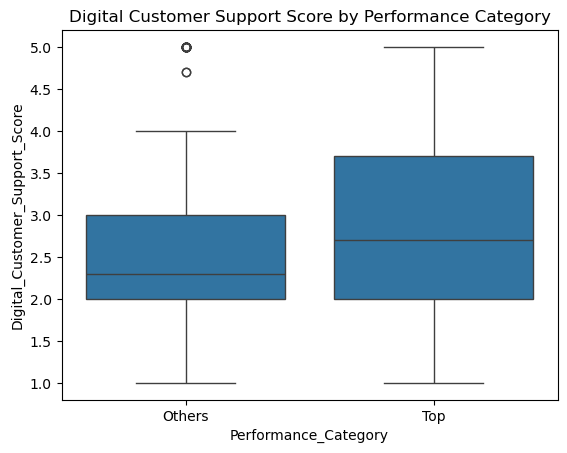

In [1380]:
sns.boxplot(x='Performance_Category', y='Digital_Customer_Support_Score', data=digital)
plt.title('Digital Customer Support Score by Performance Category')
plt.show()

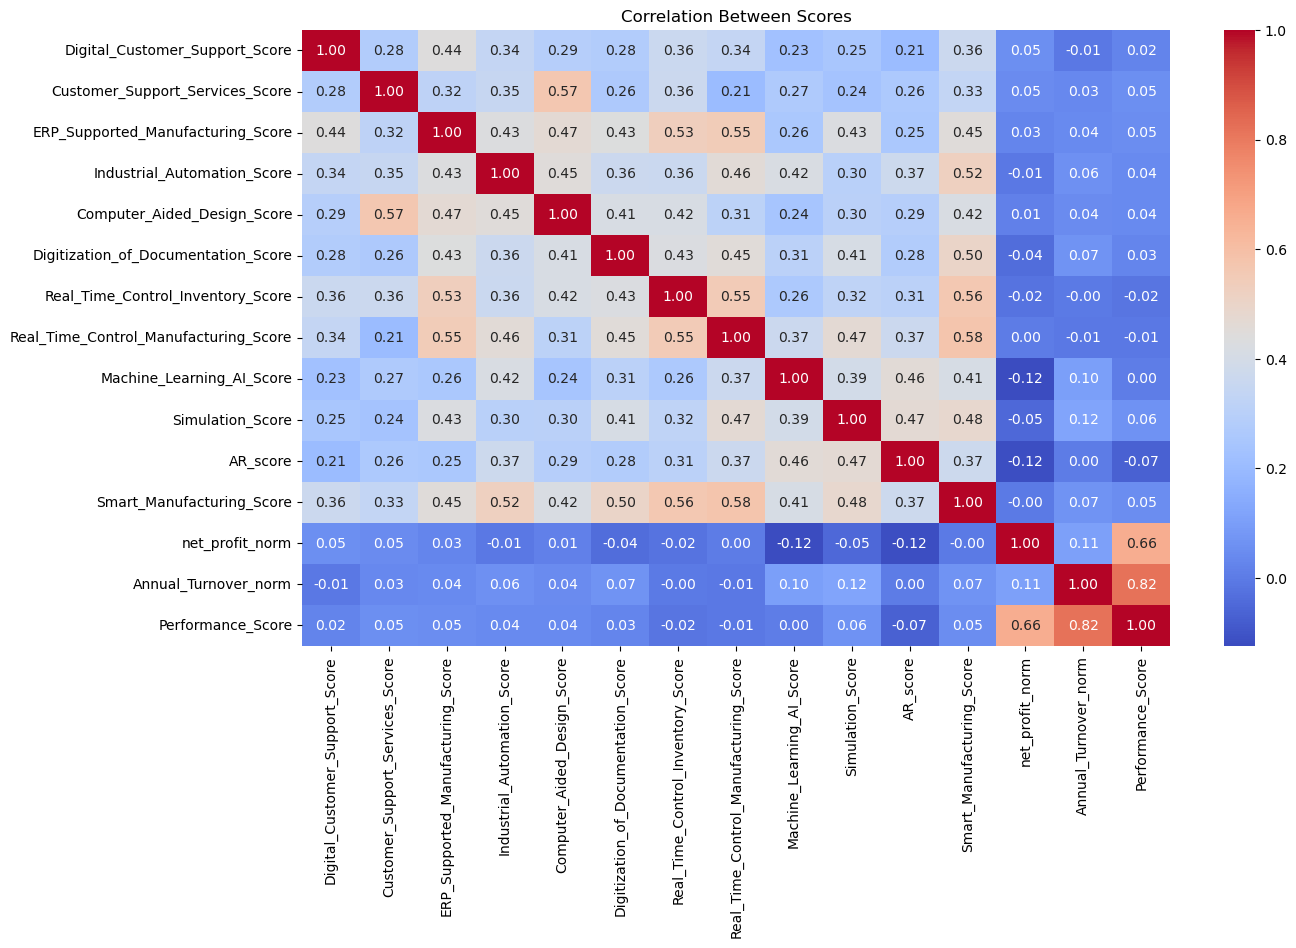

In [1381]:
plt.figure(figsize=(14,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Scores')
plt.show()

In [1382]:
top_performers = digital[digital['Performance_Category'] == 'Top']
others = digital[digital['Performance_Category'] == 'Others']


In [1383]:
top_performers

,industry,Digital_Customer_Support_Score,Customer_Support_Services_Score,ERP_Supported_Manufacturing_Score,Industrial_Automation_Score,Computer_Aided_Design_Score,Digitization_of_Documentation_Score,Real_Time_Control_Inventory_Score,Real_Time_Control_Manufacturing_Score,Machine_Learning_AI_Score,Simulation_Score,AR_score,Smart_Manufacturing_Score,net_profit_norm,Annual_Turnover_norm,Performance_Score,Performance_Category
4,Centrinio šildymo radiatorių ir katilų gamyba,1.0,2.0,3.7,1.0,3.3,3.3,2.7,1.0,1.0,1.0,1.0,1.0,0.387087,0.000900,0.193993,Top
6,medienos biokuras,4.0,2.0,3.7,2.7,3.3,4.5,5.0,3.0,2.0,2.3,2.0,3.0,0.394202,0.001745,0.197973,Top
9,"Nuo nurūgštinimo , trąšų gamyba",2.7,3.3,3.7,2.7,2.0,3.3,4.3,2.0,2.0,5.0,4.3,4.0,0.389566,0.000087,0.194827,Top
21,Drabužių gamyba.,4.3,3.0,4.7,3.5,3.5,4.3,3.7,4.3,3.0,3.3,3.3,3.7,0.386417,0.001003,0.193710,Top
61,kieto kūno lazeriai,2.0,4.0,3.3,2.0,2.7,3.3,2.7,2.0,2.0,2.0,2.7,2.0,0.386684,0.000263,0.193473,Top
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,"Dujos,benzinas,žibalas.",2.3,3.7,3.7,3.3,4.0,4.0,3.3,2.0,3.0,4.0,2.0,3.7,0.383938,1.000000,0.691969,Top
490,"plastikines detales, duris automobiliniams šal...",2.7,5.0,5.0,4.0,5.0,3.7,4.0,4.0,2.3,2.0,2.0,3.7,0.387492,0.000729,0.194110,Top
492,mechanika,4.0,3.0,4.3,3.7,3.0,4.0,4.0,4.0,2.0,1.0,2.0,1.7,0.456762,0.003775,0.230268,Top
494,mėsos gaminius,1.3,3.3,1.5,2.3,1.5,2.7,4.0,3.3,1.7,2.0,2.0,2.7,0.382882,0.003969,0.193425,Top


In [1384]:
top_corr = top_performers.select_dtypes(include=['number'])
top_corr_matrix = top_corr.corr()


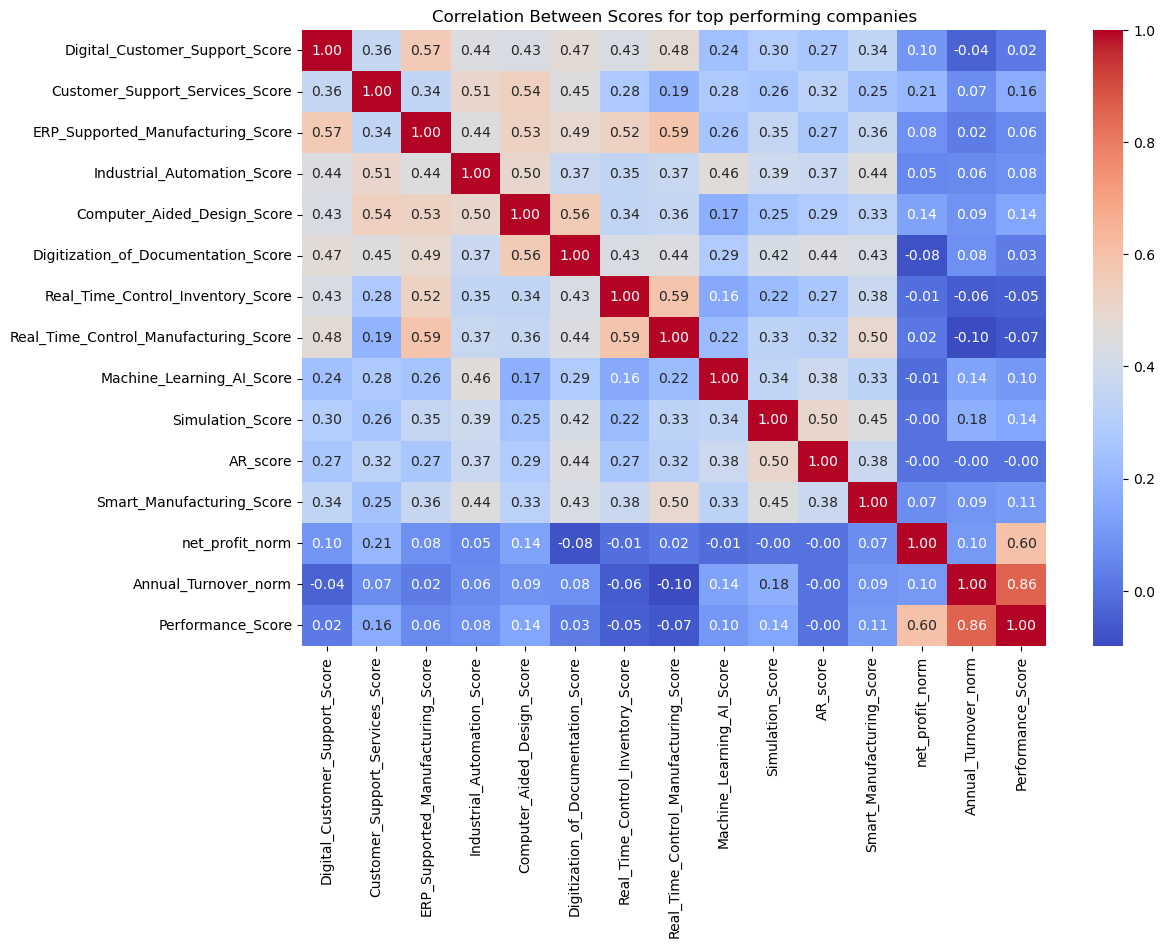

In [1385]:
plt.figure(figsize=(12,8))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Scores for top performing companies')
plt.show()

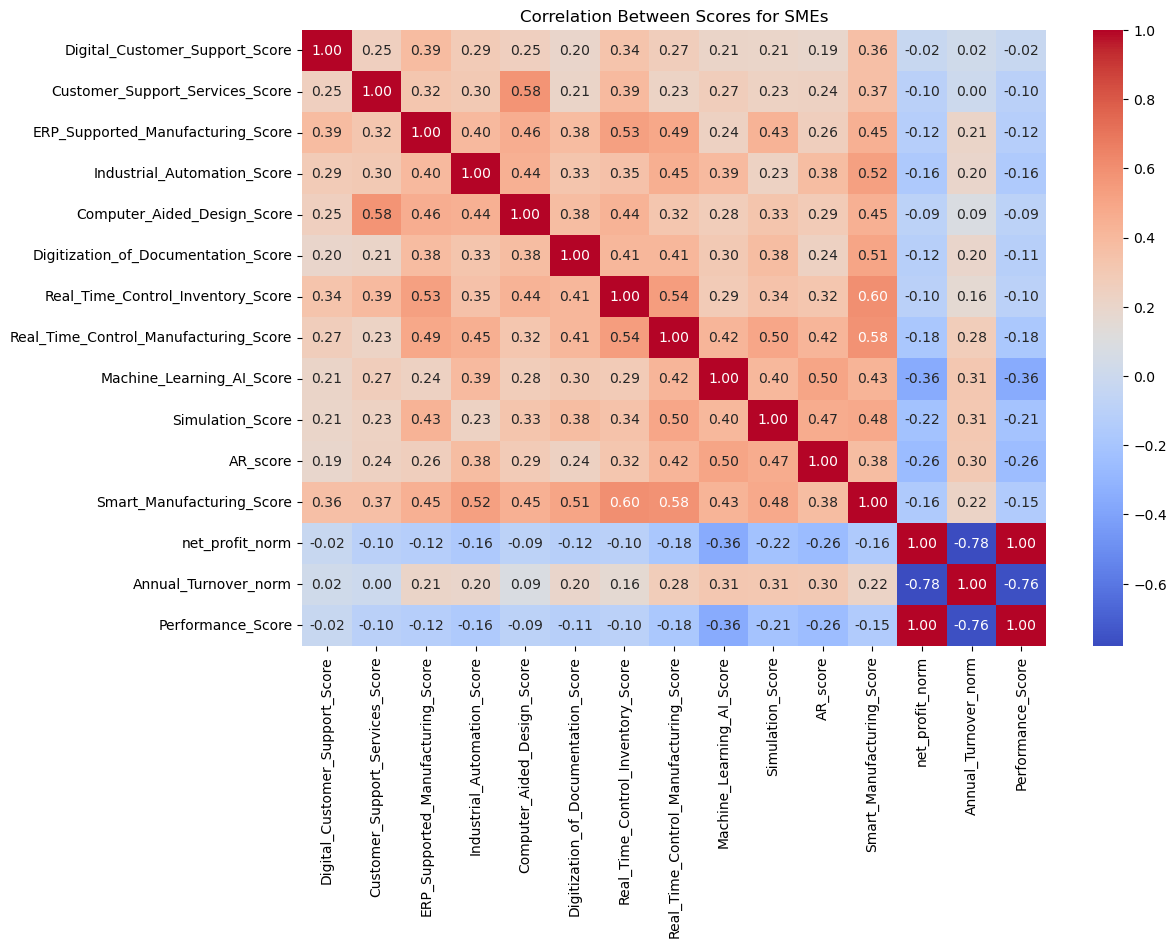

In [1386]:
others_corr = others.select_dtypes(include=['number'])
others_corr_matrix = others_corr.corr()

plt.figure(figsize=(12,8))
sns.heatmap(others_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Scores for SMEs')
plt.show()

/var/folders/p4/scbl6gdx7834jxtztb0_p47w0000gn/T/ipykernel_1115/659553146.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Performance_Category', y='Machine_Learning_AI_Score', data=digital, ci='sd')


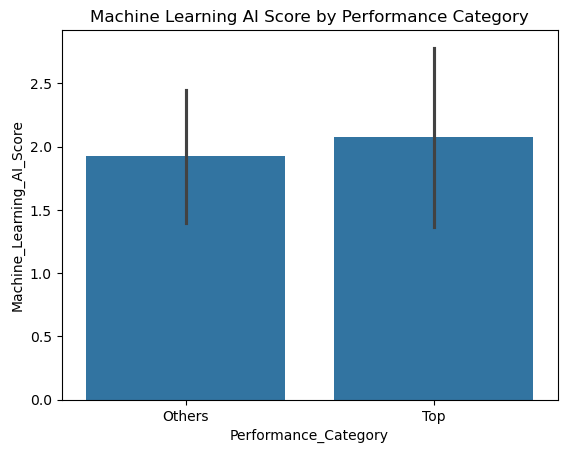

In [1387]:
sns.barplot(x='Performance_Category', y='Machine_Learning_AI_Score', data=digital, ci='sd')
plt.title('Machine Learning AI Score by Performance Category')
plt.show()

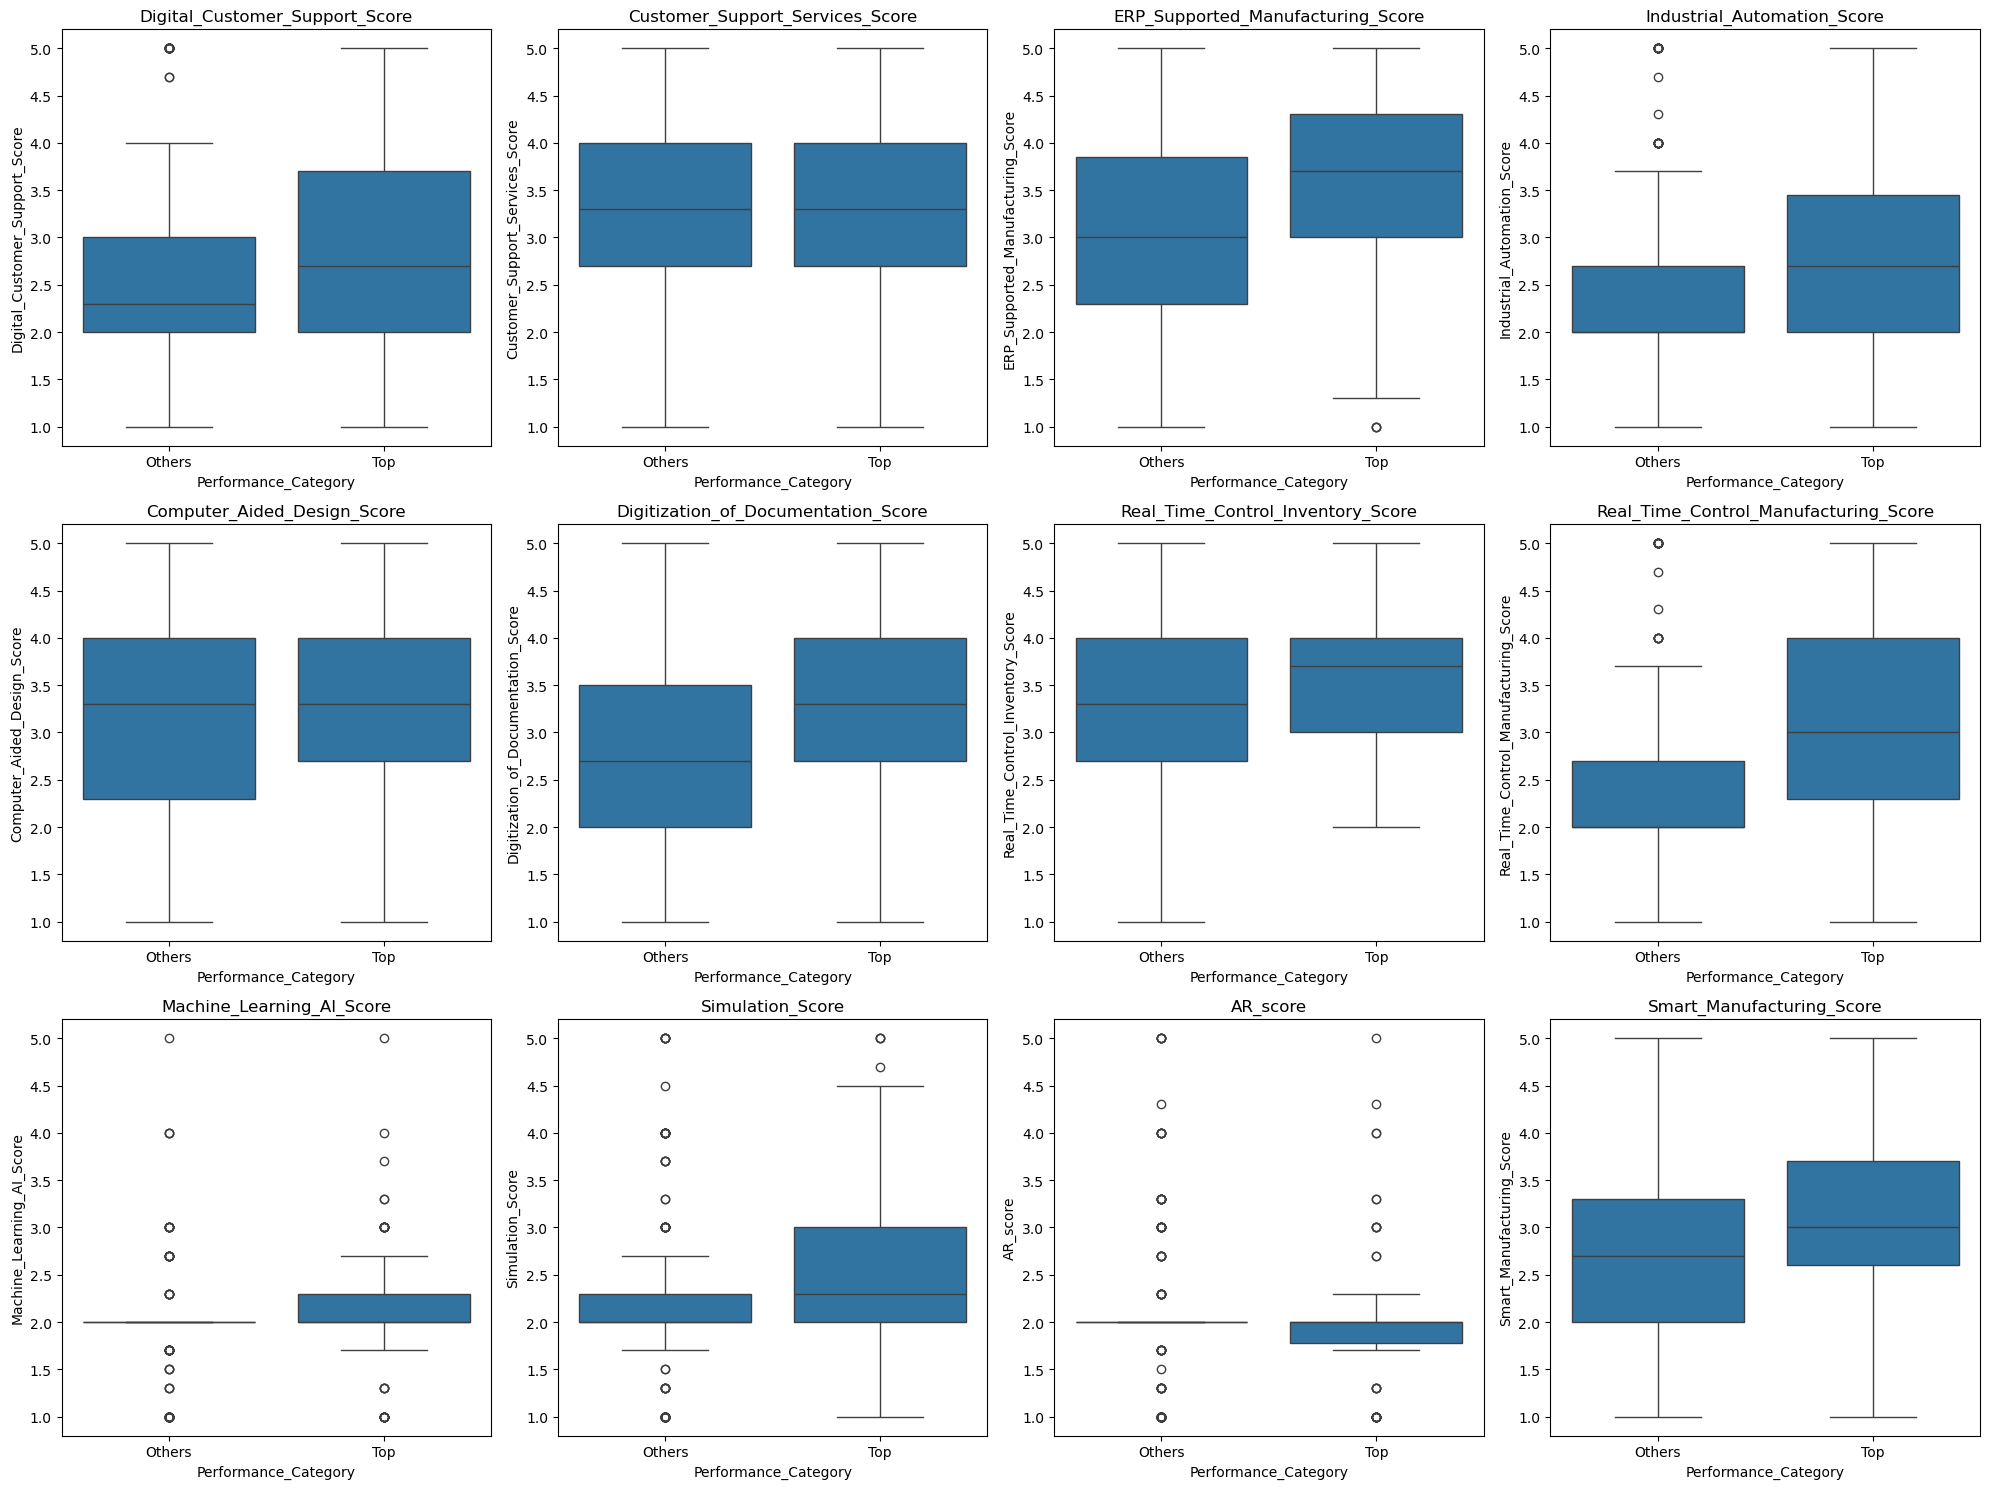

In [1388]:
# Define predictors (features to plot)
predictors = [
    'Digital_Customer_Support_Score',
    'Customer_Support_Services_Score',
    'ERP_Supported_Manufacturing_Score',
    'Industrial_Automation_Score',
    'Computer_Aided_Design_Score',
    'Digitization_of_Documentation_Score',
    'Real_Time_Control_Inventory_Score',
    'Real_Time_Control_Manufacturing_Score',
    'Machine_Learning_AI_Score',
    'Simulation_Score',
    'AR_score',
    'Smart_Manufacturing_Score'
    
]

# Create subplots (2 rows, 5 columns)
fig, axs = plt.subplots(3, 4, figsize=(20, 15))

# Iterate over predictors and create boxplots
for i, feature in enumerate(predictors):
    sns.boxplot(data=digital, x="Performance_Category", y=feature, ax=axs[i // 4, i % 4])
    axs[i // 4, i % 4].set_title(feature)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


    Higher Median Scores for Top Performers:
        Across most digitalization dimensions (e.g., ERP_Supported_Manufacturing_Score, Industrial_Automation_Score, Simulation_Score), the median scores for top performers are higher than those for others. This suggests a strong association between higher digitalization levels and top performance.

    Wider Range for Top Performers:
        The range of scores (distance between the minimum and maximum values) is generally broader for top performers. This indicates that while many top performers invest heavily in digitalization, there are some that might not yet leverage digital tools fully.

    Key Dimensions with Significant Differences:
        ERP_Supported_Manufacturing_Score and Real_Time_Control_Manufacturing_Score:
            These scores show a clear difference between top performers and others, with higher values for top performers.
        Simulation_Score:
            The simulation score for top performers shows a noticeable increase compared to others, suggesting this tool may provide a competitive advantage.

    Outliers:
        Some outliers (points outside the whiskers) are present, especially for top performers. This could indicate companies investing heavily in specific digitalization areas.

Insights by Dimension

    Digital_Customer_Support_Score:
        Slightly higher for top performers, suggesting some focus on digital customer support among successful companies.

    Machine_Learning_AI_Score:
        Top performers exhibit a wider range but have some low scores, indicating varied adoption levels of AI/ML solutions.

    Computer_Aided_Design_Score:
        Scores are generally high for top performers, with a tighter distribution than others.

    Digitization_of_Documentation_Score:
        Higher medians for top performers suggest digitized documentation contributes to performance improvements.

In [1389]:

for feature in predictors:
    t_stat, p_val = ttest_ind(
        digital[digital['Performance_Category'] == 'Top'][feature],
        digital[digital['Performance_Category'] == 'Others'][feature],
        nan_policy='omit'
    )
    print(f"{feature}: t-stat={t_stat:.2f}, p-val={p_val:.4f}")


Digital_Customer_Support_Score: t-stat=1.83, p-val=0.0686
Customer_Support_Services_Score: t-stat=-0.07, p-val=0.9431
ERP_Supported_Manufacturing_Score: t-stat=4.27, p-val=0.0000
Industrial_Automation_Score: t-stat=3.75, p-val=0.0002
Computer_Aided_Design_Score: t-stat=0.15, p-val=0.8833
Digitization_of_Documentation_Score: t-stat=3.78, p-val=0.0002
Real_Time_Control_Inventory_Score: t-stat=2.44, p-val=0.0152
Real_Time_Control_Manufacturing_Score: t-stat=6.20, p-val=0.0000
Machine_Learning_AI_Score: t-stat=2.14, p-val=0.0330
Simulation_Score: t-stat=3.18, p-val=0.0016
AR_score: t-stat=-0.25, p-val=0.8041
Smart_Manufacturing_Score: t-stat=3.05, p-val=0.0025


    Statistically Significant Differences (p < 0.05):
        ERP_Supported_Manufacturing_Score (p = 0.0000):
            Strong evidence that top performers score significantly higher in ERP-supported manufacturing than others.
        Industrial_Automation_Score (p = 0.0007):
            Top performers show significantly higher automation levels.
        Digitization_of_Documentation_Score (p = 0.0029):
            Clear difference in documentation digitization practices.
        Real_Time_Control_Inventory_Score (p = 0.0050):
            Real-time inventory control is significantly higher for top performers.
        Real_Time_Control_Manufacturing_Score (p = 0.0000):
            Top performers significantly outpace others in real-time manufacturing control.
        Machine_Learning_AI_Score (p = 0.0003):
            Indicates that top performers are more likely to use AI/ML technologies.
        Simulation_Score (p = 0.0030):
            Strong adoption of simulation tools among top performers.

    Non-Significant Differences (p ≥ 0.05):
        Digital_Customer_Support_Score (p = 0.0857):
            No strong evidence of a significant difference in customer support digitalization.
        Customer_Support_Services_Score (p = 0.4232):
            Minimal difference between the two groups for customer support services.
        Computer_Aided_Design_Score (p = 0.3826):
            Adoption of CAD tools does not differ significantly.